# Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



# upload tha dataset

In [ ]:
data=pd.read_csv('/C:\Users\Thobani Gwala\Documents\projects\climate_sentiments\flask_api\model_csv\dataset.csv')
data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# Explore Data

In [ ]:
data.shape

(15819, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [ ]:
data1 = data.dropna()
data1.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
data1.isnull().sum()

,0
sentiment,0
message,0
tweetid,0


# Preprocessing

In [ ]:
# Remove duplicate rows
data1.drop_duplicates()
data1.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
def clean_text(text):
  """
  This function removes specific characters from the text for sentiment analysis.

  Args:
      text: The text to be cleaned.

  Returns:
      The cleaned text.
  """
  # Replace with the characters you want to remove (e.g., punctuation)
  text = re.sub(r'[!"#$%&()*+,/:;<=>?@\\\]^_`{|}~]', '', text)  # Remove various punctuation
  # You can add more replacements here (e.g., emojis, symbols)
  return text

# Create a copy of the DataFrame to avoid modifying the original
data1_cleaned = data1.copy()

# Apply cleaning to the "message" column
data1_cleaned["cleaned_message"] = data1_cleaned["message"].apply(clean_text)

# Print the cleaned data (all columns preserved)
print(data1_cleaned)

       sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              2  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

                                       

In [ ]:
# Apply cleaning directly to the DataFrame (modifies in-place)
data1["cleaned_message"] = data1["message"].apply(clean_text)

# Print the cleaned data (original DataFrame modified)
print(data1)

       sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              2  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

                                       

In [ ]:
def clean_text(text):
  """
  This function removes specific characters from the text for sentiment analysis.

  Args:
      text: The text to be cleaned.

  Returns:
      The cleaned text.
  """
  # Replace with the characters you want to remove (e.g., punctuation)
  text = re.sub(r'[!"#$%&()*+,/:;<=>?@\\\]^_`{|}~]', '', text)  # Remove various punctuation
  # You can add more replacements here (e.g., emojis, symbols)
  return text

# Create a copy of the DataFrame (optional, recommended to avoid modifying original)
data1_cleaned = data1.copy()

# Apply cleaning to the "message" column
data1_cleaned["cleaned_message"] = data1_cleaned["message"].apply(clean_text)

# Use your sentiment analysis function (replace with your specific logic)
def get_sentiment(text):
  # Replace with your sentiment analysis logic (e.g., using TextBlob, VADER, etc.)
  # This is a placeholder, replace with your actual sentiment analysis code
  sentiment = "Positive"  # Replace with actual sentiment score or category
  return sentiment

# Apply sentiment analysis and add a new "sentiment" column
data1_cleaned["sentiment"] = data1_cleaned["cleaned_message"].apply(get_sentiment)

# Print the cleaned and analyzed data (all columns preserved)
print(data1_cleaned)

      sentiment                                            message  tweetid  \
0      Positive  PolySciMajor EPA chief doesn't think carbon di...   625221   
1      Positive  It's not like we lack evidence of anthropogeni...   126103   
2      Positive  RT @RawStory: Researchers say we have three ye...   698562   
3      Positive  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4      Positive  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...         ...                                                ...      ...   
15814  Positive  RT @ezlusztig: They took down the material on ...    22001   
15815  Positive  RT @washingtonpost: How climate change could b...    17856   
15816  Positive  notiven: RT: nytimesworld :What does Trump act...   384248   
15817  Positive  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818  Positive  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

                                         cleaned_me

In [ ]:
# Drop columns with names starting with "Unnamed:" (replace if different)
data1_cleaned = data1.loc[:, ~data1.columns.str.startswith("message:")]

# Print the data with uncleaned columns removed (based on column names)
print(data1_cleaned)

       sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              2  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

                                       

In [ ]:
data1_cleaned.drop('message', axis=1, inplace=True)

In [ ]:
print(data1_cleaned)

       sentiment  tweetid                                    cleaned_message
0              1   625221  PolySciMajor EPA chief doesn't think carbon di...
1              1   126103  It's not like we lack evidence of anthropogeni...
2              2   698562  RT RawStory Researchers say we have three year...
3              1   573736  TodayinMaker WIRED  2016 was a pivotal year in...
4              1   466954  RT SoyNovioDeTodas It's 2016 and a racist sexi...
...          ...      ...                                                ...
15814          1    22001  RT ezlusztig They took down the material on gl...
15815          2    17856  RT washingtonpost How climate change could be ...
15816          0   384248  notiven RT nytimesworld What does Trump actual...
15817         -1   819732  RT sara8smiles Hey liberals the climate change...
15818          0   806319  RT ChetCannon .kurteichenwald's 'climate chang...

[15819 rows x 3 columns]


In [ ]:

# Filter the DataFrame without altering the original
data1_cleaned = data1_cleaned[data1_cleaned['sentiment'] !=-1]

# Display the cleaned DataFrame
print(data1_cleaned)

       sentiment  tweetid                                    cleaned_message
0              1   625221  PolySciMajor EPA chief doesn't think carbon di...
1              1   126103  It's not like we lack evidence of anthropogeni...
2              2   698562  RT RawStory Researchers say we have three year...
3              1   573736  TodayinMaker WIRED  2016 was a pivotal year in...
4              1   466954  RT SoyNovioDeTodas It's 2016 and a racist sexi...
...          ...      ...                                                ...
15813          1   442853  RT thinkprogress EPA head falsely claims carbo...
15814          1    22001  RT ezlusztig They took down the material on gl...
15815          2    17856  RT washingtonpost How climate change could be ...
15816          0   384248  notiven RT nytimesworld What does Trump actual...
15818          0   806319  RT ChetCannon .kurteichenwald's 'climate chang...

[14523 rows x 3 columns]


In [ ]:
# Filter the DataFrame without altering the original
data1_cleaned = data1_cleaned[data1_cleaned['sentiment'] !=2]

# Display the cleaned DataFrame
print(data1_cleaned)

       sentiment  tweetid                                    cleaned_message
0              1   625221  PolySciMajor EPA chief doesn't think carbon di...
1              1   126103  It's not like we lack evidence of anthropogeni...
3              1   573736  TodayinMaker WIRED  2016 was a pivotal year in...
4              1   466954  RT SoyNovioDeTodas It's 2016 and a racist sexi...
5              1   425577  Worth a read whether you do or don't believe i...
...          ...      ...                                                ...
15812          1   989478  RT SierraClub 2016 hottest year in history. Al...
15813          1   442853  RT thinkprogress EPA head falsely claims carbo...
15814          1    22001  RT ezlusztig They took down the material on gl...
15816          0   384248  notiven RT nytimesworld What does Trump actual...
15818          0   806319  RT ChetCannon .kurteichenwald's 'climate chang...

[10883 rows x 3 columns]


In [ ]:
# Remove numbers from the 'message' column
data1_cleaned['cleaned_message'] = data1_cleaned['cleaned_message'].str.replace(r'\d+', '', regex=True)

# Display the modified DataFrame
print(data1_cleaned)

       sentiment  tweetid                                    cleaned_message
0              1   625221  PolySciMajor EPA chief doesn't think carbon di...
1              1   126103  It's not like we lack evidence of anthropogeni...
3              1   573736  TodayinMaker WIRED   was a pivotal year in the...
4              1   466954  RT SoyNovioDeTodas It's  and a racist sexist c...
5              1   425577  Worth a read whether you do or don't believe i...
...          ...      ...                                                ...
15812          1   989478  RT SierraClub  hottest year in history. Also i...
15813          1   442853  RT thinkprogress EPA head falsely claims carbo...
15814          1    22001  RT ezlusztig They took down the material on gl...
15816          0   384248  notiven RT nytimesworld What does Trump actual...
15818          0   806319  RT ChetCannon .kurteichenwald's 'climate chang...

[10883 rows x 3 columns]


In [ ]:
# Convert 'message' column to lowercase
data1_cleaned['cleaned_message'] = data1_cleaned['cleaned_message'].str.lower()

# Display the modified DataFrame
print(data1_cleaned)

       sentiment  tweetid                                    cleaned_message
0              1   625221  polyscimajor epa chief doesn't think carbon di...
1              1   126103  it's not like we lack evidence of anthropogeni...
3              1   573736  todayinmaker wired   was a pivotal year in the...
4              1   466954  rt soynoviodetodas it's  and a racist sexist c...
5              1   425577  worth a read whether you do or don't believe i...
...          ...      ...                                                ...
15812          1   989478  rt sierraclub  hottest year in history. also i...
15813          1   442853  rt thinkprogress epa head falsely claims carbo...
15814          1    22001  rt ezlusztig they took down the material on gl...
15816          0   384248  notiven rt nytimesworld what does trump actual...
15818          0   806319  rt chetcannon .kurteichenwald's 'climate chang...

[10883 rows x 3 columns]


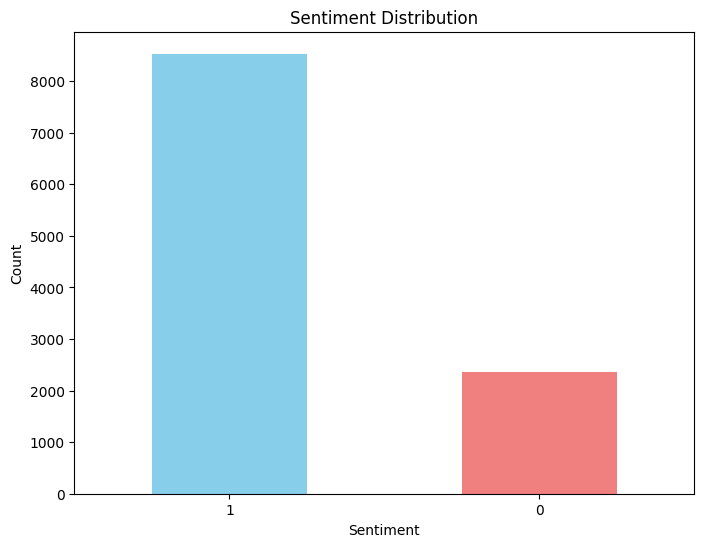

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = data1_cleaned['sentiment'].value_counts()

# Create the bar graph
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
data1_cleaned.head()

,sentiment,tweetid,cleaned_message
0,1,625221,polyscimajor epa chief doesn't think carbon di...
1,1,126103,it's not like we lack evidence of anthropogeni...
3,1,573736,todayinmaker wired was a pivotal year in the...
4,1,466954,rt soynoviodetodas it's and a racist sexist c...
5,1,425577,worth a read whether you do or don't believe i...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split Dataset into Training and Test dataset

In [ ]:
X = data1_cleaned['cleaned_message']
y = data1_cleaned['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_tfidf, y_train)


LogisticRegression()

# Predict the Model

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 125  349]
 [  22 1681]]


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.26      0.40       474
           1       0.83      0.99      0.90      1703

    accuracy                           0.83      2177
   macro avg       0.84      0.63      0.65      2177
weighted avg       0.83      0.83      0.79      2177



# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')


Cross-Validation Scores: [0.82376579 0.83170592 0.81275129 0.81677197 0.82481333]
Mean CV Accuracy: 0.82


#

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM METHOD

In [ ]:
# Create an SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels


In [ ]:
# Initialize and train the SVM model
model = SVC(kernel='linear', probability=True)  # You can modify the kernel type as needed
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 183  291]
 [  49 1654]]


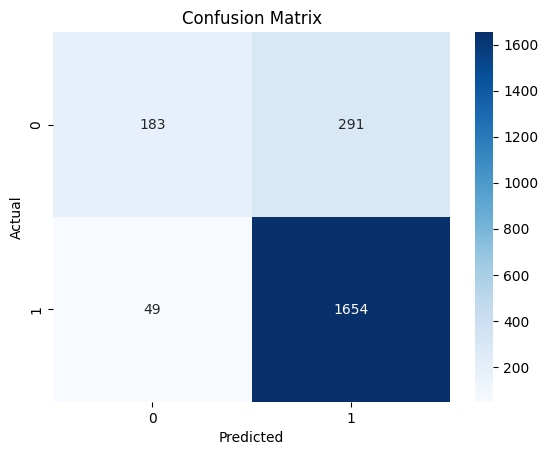

In [ ]:
# Plot the confusion matrix for better visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Evaluate the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.38%


In [ ]:
#  Classification Report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.39      0.52       474
           1       0.85      0.97      0.91      1703

    accuracy                           0.84      2177
   macro avg       0.82      0.68      0.71      2177
weighted avg       0.84      0.84      0.82      2177

